# Ward clustering example

Here we fit some random points to 2 clusters using the Ward metric and then predict their cluster assignments using the new prediction function. Due to the cardinality dependence of the Ward objective function, data points at the edges of clusters may be assigned to different clusters than the ones to which they were fit.

In [3]:
from msmbuilder.cluster import LandmarkAgglomerative
import numpy as np
import matplotlib.pyplot as plt
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Generate some random data
xy1 = np.random.randn(50,2)
xy2 = np.random.randn(50,2)+1
xy = np.concatenate([xy1,xy2])

In [5]:
# Cluster with Ward clustering
clusterer = LandmarkAgglomerative(n_clusters=2, n_landmarks=None,
                            linkage='ward', metric='euclidean')
clusterer.fit([xy])
fit_assignments = clusterer.landmark_labels_
predict_assignments = clusterer.predict([xy])[0]

In [13]:
# Investigate fit/predict fidelity
count = 0
discrep_list = []
for i in range(xy.shape[0]):
    if fit_assignments[i] == predict_assignments[i]:
        count = count + 1
    else:
        discrep_list.append(i)
print("Prediction maintains {}% fidelity to fit assignments." \
      .format(100*count/(xy.shape[0]+0.0)))

Prediction maintains 93.0% fidelity to fit assignments.


In [16]:
# Group fit and predict points by cluster assignments
fit_0 = xy[fit_assignments == 0]
fit_1 = xy[fit_assignments == 1]

pred_0 = xy[predict_assignments == 0]
pred_1 = xy[predict_assignments == 1]

c_fit_list=np.empty(len(discrep_list))
c_pred_list=np.empty(len(discrep_list))

for i in range(len(discrep_list)):
    c_fit_list[i] = fit_assignments[discrep_list[i]]
    c_pred_list[i] = predict_assignments[discrep_list[i]]

([<matplotlib.axis.YTick at 0x113e41e10>,
 <a list of 4 Text yticklabel objects>)

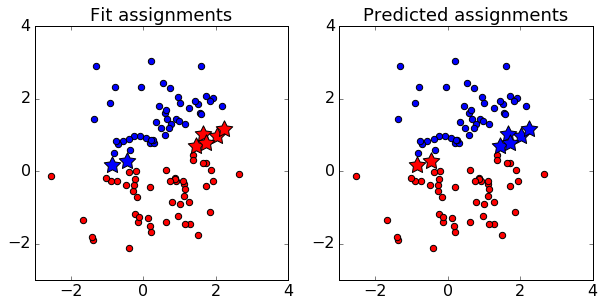

In [22]:
# Visualize clustering results and highlight discrepancies
# between fit and predict
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1, aspect='equal')
plt.title('Fit assignments',fontsize=18)
plt.scatter(fit_0[:,0],fit_0[:,1],c='b',s=40)
plt.scatter(fit_1[:,0],fit_1[:,1],c='r',s=40)

for i in range(len(discrep_list)):
    if c_fit_list[i] == 0:
        plt.scatter(xy[discrep_list[i],0], xy[discrep_list[i],1],
                    c='b', s=300, marker=(5,1))
    if c_fit_list[i] == 1:
        plt.scatter(xy[discrep_list[i],0], xy[discrep_list[i],1],
                    c='r', s=300, marker=(5,1))
plt.xlim((-3,4))
plt.ylim((-3,4))
plt.xticks((-2,0,2,4), fontsize=16)
plt.yticks((-2,0,2,4), fontsize=16)


plt.subplot(1,2,2, aspect='equal')
plt.title('Predicted assignments',fontsize=18)
plt.scatter(pred_0[:,0],pred_0[:,1],c='b',s=40)
plt.scatter(pred_1[:,0],pred_1[:,1],c='r',s=40)

for i in range(len(discrep_list)):
    if c_pred_list[i] == 0:
        plt.scatter(xy[discrep_list[i],0], xy[discrep_list[i],1],
                    c='b', s=300, marker=(5,1))
    if c_pred_list[i] == 1:
        plt.scatter(xy[discrep_list[i],0], xy[discrep_list[i],1],
                    c='r', s=300, marker=(5,1))
plt.xlim((-3,4))
plt.ylim((-3,4))
plt.xticks((-2,0,2,4), fontsize=16)
plt.yticks((-2,0,2,4), fontsize=16)